In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols  # 小写的 ols 函数才会自带截距项，OLS 则不会  # 固定格式：因变量 ~ 自变量(+ 号连接)
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [1]:
def read_check_data(filename):
    lplteamData = pd.read_excel(filename, sheet_name=0)
    xrow_list = np.array(lplteamData['team'])
    xticks_labels = ['{}'.format(i) for i in xrow_list]  # 修改横坐标的刻度
    plt.xticks(np.linspace(0,17,17,endpoint=True),xticks_labels)
    # 输出每个列丢失值
    total = lplteamData.isnull().sum().sort_values(ascending=False)
    print(total)
    data = lplteamData.drop(lplteamData[lplteamData['totalDie_perGame'].isnull()].index)
    x_first = np.array(data['totalKill_perGame'])
    x_second = np.array(data['totalDie_perGame'])
    x_third = np.array(data['catchEye_perGame'])
    x_fourth = np.array(data['rowEye_perGame'])
    x_fifth = np.array(data['money_perGame'])
    x_sixth = np.array(data['baron_perGame'])
    x_seventh = np.array(data['dragon_perGame'])
    x = range(1, len(x_first) + 1)
    y_winRate = np.array(data['winRate'])
    # 可视化展示数据
    plt.title(filename[0: 9] + "战队数据")
    plt.plot(x, x_first, '.', label='总击杀')
    plt.plot(x, x_second, '.', label='总死亡')
    plt.plot(x, x_third, '.', label='场均插眼')
    plt.plot(x, x_fourth, '.', label='场均排眼')
    #plt.plot(x, x_fifth, '.', label='场均金钱')
    plt.plot(x, x_sixth, '.', label='场均大龙')
    plt.plot(x, x_seventh, '.', label='场均小龙')
    plt.plot(x, y_winRate, '.', label='胜率')
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    plt.figure(figsize=(10,8),dpi=150)
    return x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate


def multiple_regression(x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate):
    x = range(1, len(x_first) + 1)
    print("矩阵：",list(zip(np.ones(len(y_winRate)), x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh)))
    Y = y_winRate.T                      # 矩阵
    X = np.array([list(x) for x in zip(np.ones(len(y_winRate)), x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh)])
    B = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), Y)   # (X.T * X)-1 * X.T * Y
    print("B = ", B)
    # 多元线性回归模型
    print("回归方程为 y = %f + %fx1 + %fx2 + %fx3 + %fx4 + %fx5 + %fx6 + %fx7" % (B[0], B[1], B[2], B[3], B[4], B[5], B[6], B[7]))
    y_predict = B[0] + B[1] * x_first + B[2] * x_second + B[3] * x_third + B[4] * x_fourth + B[5] * x_fifth + B[6] * x_sixth + B[7] * x_seventh
    # 可视化
    plt.figure(figsize=(10,6), dpi=150)
    plt.title("战队胜率与预测值对比图")
    plt.plot(x, y_winRate, '*', label='胜率')
    plt.plot(x, y_predict, '.', label='预测值')
    plt.legend()
    return X, B, y_predict


# 检验
def check(y_real, y_predict, X, B):
    y1 = np.sum((y_predict - np.mean(y_real)) ** 2)
    y2 = np.sum((y_real - np.mean(y_real)) ** 2)
    R1 = y1 / y2
    print("可决系数R^2=", R1)
    R2 = 1 - ((len(y_real) - 1) / (len(y_real) - 4 - 1)) * (1 - R1 ** 2)
    print("修正自由度的可决系数R^2=", R2)
    # 计算标准估计误差
    S = (np.sum((y_real - y_predict) ** 2) / (len(y_real) - 4)) ** 0.5
    print("标准估计误差为S = ", S)
    u2 = (y_real - y_predict) ** 2
    plt.figure()
    plt.title("u^2-x散点图")
    plt.plot(u2, '.')
    plt.figure(figsize=(10,6), dpi=150)
    plt.show()
    S = (np.sum((y_real - y_predict) ** 2) / (len(y_predict) - 4)) ** 0.5
    C = np.linalg.inv(np.matmul(X.T, X))
    T = []
    for i in range(len(B)):
        T.append(B[i] / (S * C[i][i] ** 0.5))
    print(T)
    T = np.array(T)
    plt.figure(figsize=(10,6), dpi=150)
    plt.axhline(y=1.9818, ls="-", c="green")
    plt.plot(np.abs(T), '.')
    plt.show()
    print(y_predict[-1])

trank                0
team                 0
appearance           0
win_lose             0
winRate              0
totalKill_perGame    0
totalDie_perGame     0
catchEye_perGame     0
rowEye_perGame       0
money_perGame        0
baron_perGame        0
dragon_perGame       0
dtype: int64
矩阵： [(1.0, 607, 400, 108, 54, 58517, 2.6, 0.9), (1.0, 746, 541, 114, 48, 57579, 2.7, 0.8), (1.0, 713, 686, 94, 47, 54194, 1.9, 0.6), (1.0, 741, 637, 112, 49, 58933, 2.6, 0.8), (1.0, 685, 540, 133, 66, 62135, 3.0, 1.1), (1.0, 616, 522, 108, 52, 55636, 2.4, 0.7), (1.0, 549, 506, 126, 59, 58693, 2.7, 0.5), (1.0, 509, 529, 111, 54, 56158, 2.6, 0.4), (1.0, 686, 646, 101, 50, 53749, 2.5, 0.7), (1.0, 492, 525, 124, 60, 58102, 2.5, 0.7), (1.0, 565, 606, 133, 53, 57379, 2.2, 0.5), (1.0, 558, 645, 103, 54, 55431, 2.1, 0.5), (1.0, 396, 477, 98, 45, 54033, 1.9, 0.7), (1.0, 425, 460, 102, 50, 56250, 2.4, 0.6), (1.0, 491, 591, 114, 56, 57031, 2.2, 0.6), (1.0, 456, 575, 101, 52, 53101, 2.4, 0.4), (1.0, 287, 653, 91, 

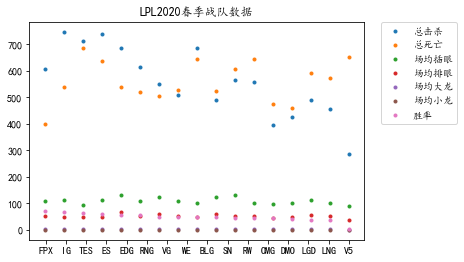

<Figure size 1500x1200 with 0 Axes>

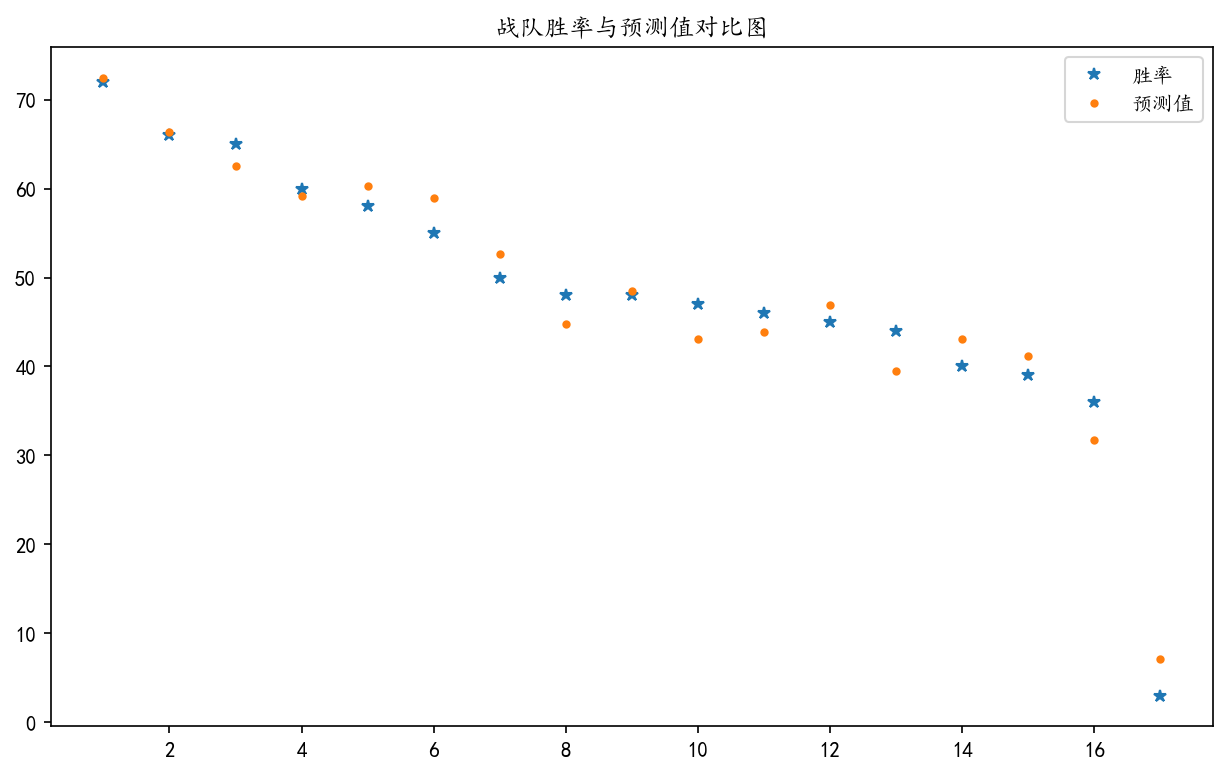

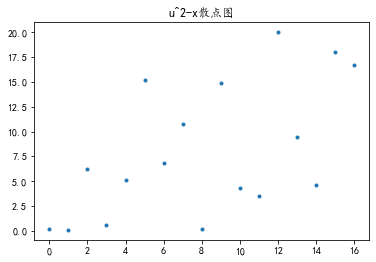

<Figure size 1500x900 with 0 Axes>

[-0.060929278488915065, 9.016056273808884, -6.343449298730637, -2.4311734599783885, 2.2184885582811087, 2.017081984073907, -3.977399924896679, -2.084442162065307]


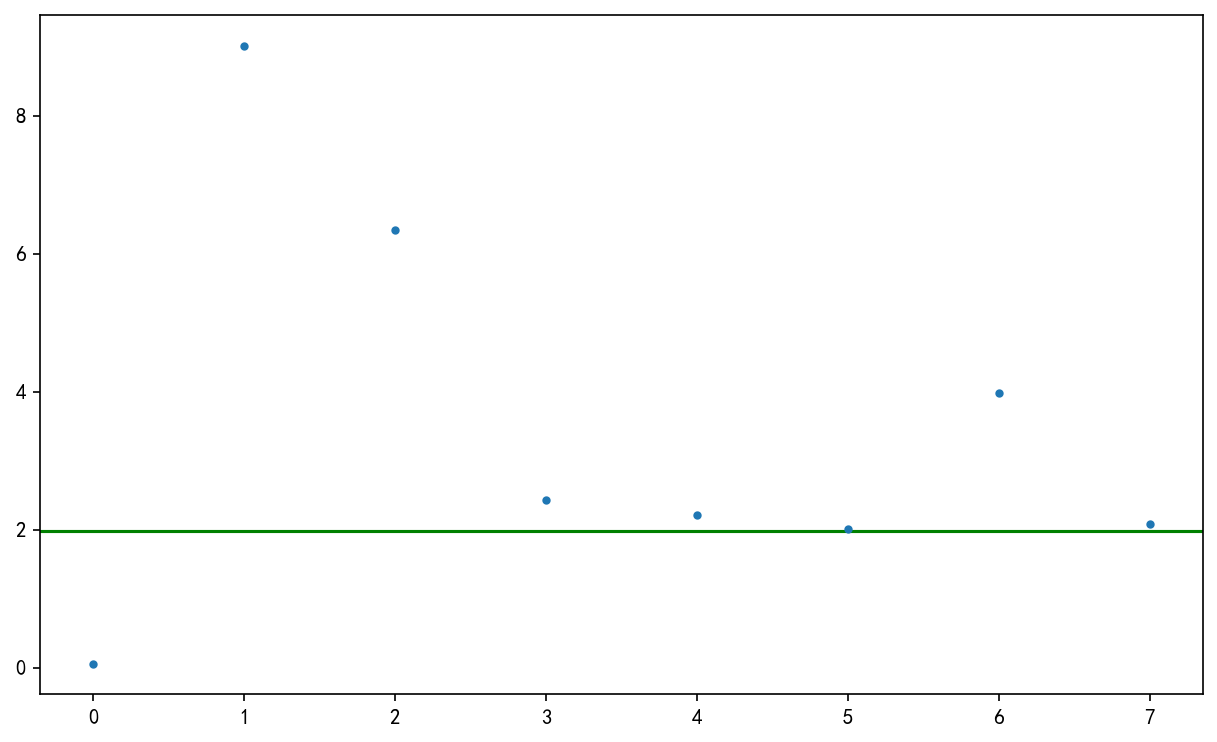

7.087520993932647


d:\bestsoftware\advancedprogramminglanguagewebdesign\python\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                winRate   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     34.65
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           8.33e-06
Time:                        05:10:08   Log-Likelihood:                -41.856
No. Observations:                  17   AIC:                             99.71
Df Residuals:                       9   BIC:                             106.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.2850     45.072     -0.051      0.961    -104.245      99.675
totalKill_perGame     0.1425      0.019      7.502      0.000       0.100       0.185
totalDie_perGame     -0.1277      0.024     -5.278      0.001      -0.182      -0.073
catchEye_perGame     -0.3293      0.163     -2.023      0.074      -0.698       0.039
rowEye_perGame        0.6278      0.340      1.846      0.098      -0.142       1.397
money_perGame         0.0019      0.001      1.678      0.128      -0.001       0.004
baron_perGame       -20.6502      6.240     -3.309      0.009     -34.766      -6.535
dragon_perGame      -16.1817      9.330     -1.734      0.117     -37.288       4.924
==============================================================================
Omnibus:                        3.881   Durbin-Watson:                   2.336
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                1.401
Skew:                           0.210   Prob(JB):                        0.496
Kurtosis:                       1.658   Cond. No.                     2.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate = read_check_data('LPL2020春季赛team数据.xlsx')
X, B, y_predict = multiple_regression(x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate)
check(y_winRate, y_predict, X, B)
df1 = pd.read_excel('LPL2020春季赛team数据.xlsx', sheet_name=0)
lm1 = ols('winRate ~ totalKill_perGame + totalDie_perGame + catchEye_perGame + rowEye_perGame + money_perGame + baron_perGame + dragon_perGame', data=df1).fit()
lm1.summary()

dragon_perGame       0
baron_perGame        0
money_perGame        0
rowEye_perGame       0
catchEye_perGame     0
totalDie_perGame     0
totalKill_perGame    0
winRate              0
win_lose             0
appearance           0
team                 0
trank                0
dtype: int64
矩阵： [(1.0, 607, 400, 108, 54, 58517, 2.6, 0.9), (1.0, 746, 541, 114, 48, 57579, 2.7, 0.8), (1.0, 713, 686, 94, 47, 54194, 1.9, 0.6), (1.0, 741, 637, 112, 49, 58933, 2.6, 0.8), (1.0, 685, 540, 133, 66, 62135, 3.0, 1.1), (1.0, 616, 522, 108, 52, 55636, 2.4, 0.7), (1.0, 549, 506, 126, 59, 58693, 2.7, 0.5), (1.0, 509, 529, 111, 54, 56158, 2.6, 0.4), (1.0, 686, 646, 101, 50, 53749, 2.5, 0.7), (1.0, 492, 525, 124, 60, 58102, 2.5, 0.7), (1.0, 565, 606, 133, 53, 57379, 2.2, 0.5), (1.0, 558, 645, 103, 54, 55431, 2.1, 0.5), (1.0, 396, 477, 98, 45, 54033, 1.9, 0.7), (1.0, 425, 460, 102, 50, 56250, 2.4, 0.6), (1.0, 491, 591, 114, 56, 57031, 2.2, 0.6), (1.0, 456, 575, 101, 52, 53101, 2.4, 0.4), (1.0, 287, 653, 91, 

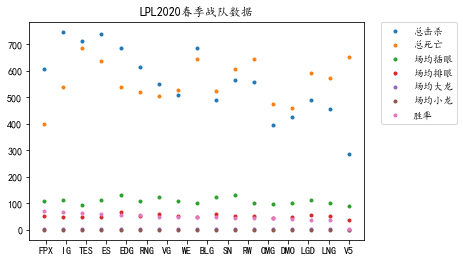

<Figure size 1500x1200 with 0 Axes>

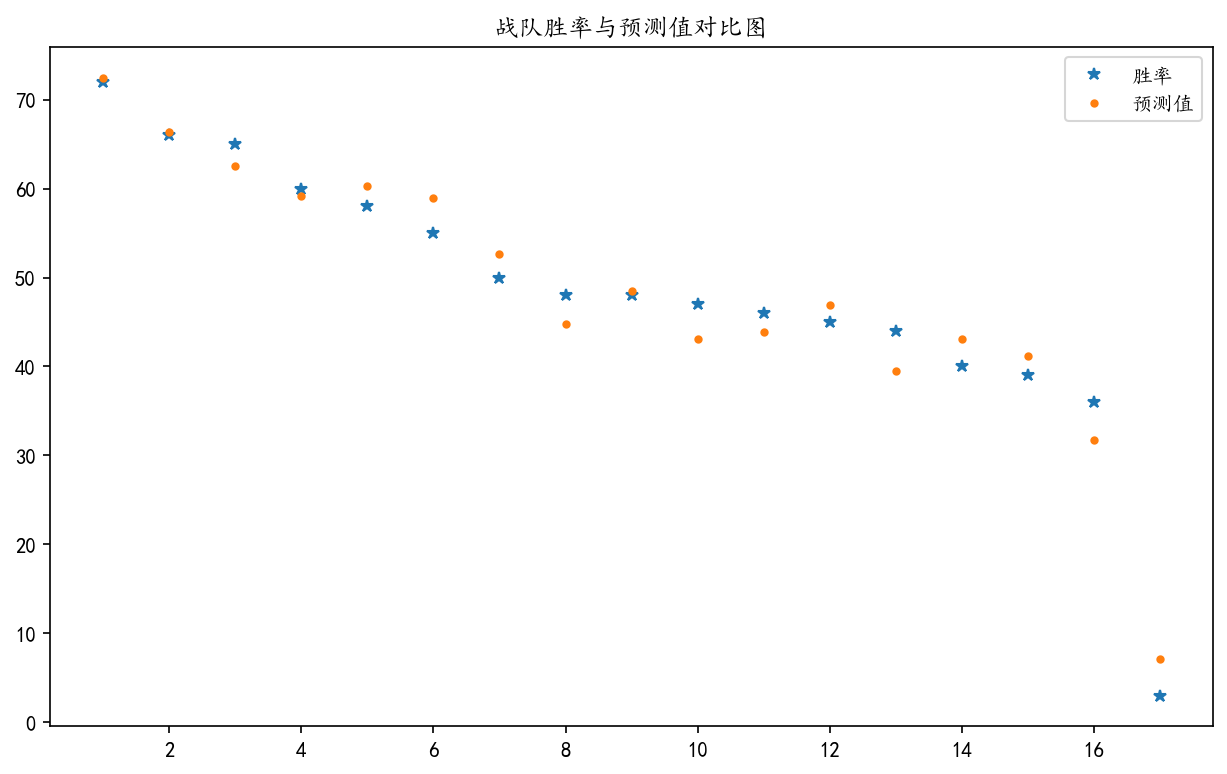

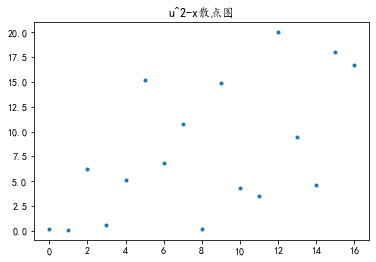

<Figure size 1500x900 with 0 Axes>

[-0.060929278488812064, 9.016056273809244, -6.3434492987315005, -2.431173459978381, 2.2184885582804585, 2.0170819840750434, -3.977399924897112, -2.084442162065798]


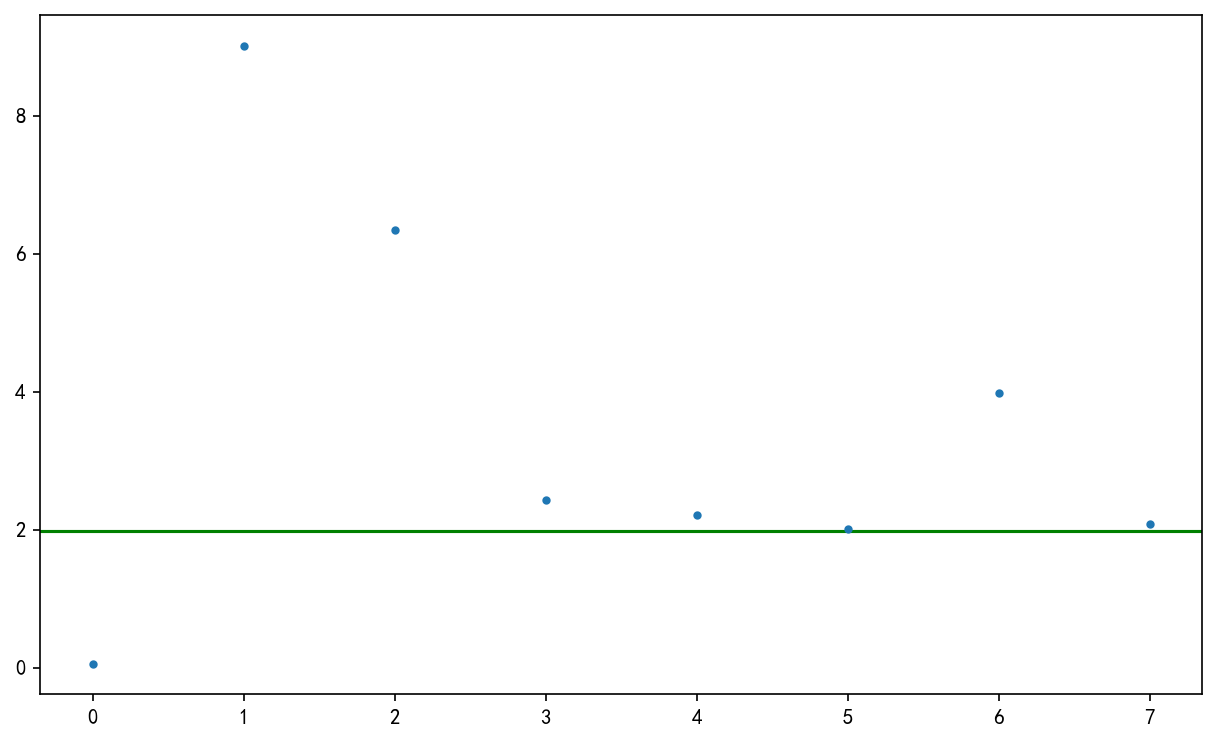

7.087520993970329


D:\BestSoftware\AdvancedProgrammingLanguageWebDesign\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                winRate   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     34.65
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           8.33e-06
Time:                        22:59:20   Log-Likelihood:                -41.856
No. Observations:                  17   AIC:                             99.71
Df Residuals:                       9   BIC:                             106.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.2850     45.072     -0.051      0.961    -104.245      99.675
totalKill_perGame     0.1425      0.019      7.502      0.000       0.100       0.185
totalDie_perGame     -0.1277      0.024     -5.278      0.001      -0.182      -0.073
catchEye_perGame     -0.3293      0.163     -2.023      0.074      -0.698       0.039
rowEye_perGame        0.6278      0.340      1.846      0.098      -0.142       1.397
money_perGame         0.0019      0.001      1.678      0.128      -0.001       0.004
baron_perGame       -20.6502      6.240     -3.309      0.009     -34.766      -6.535
dragon_perGame      -16.1817      9.330     -1.734      0.117     -37.288       4.924
==============================================================================
Omnibus:                        3.881   Durbin-Watson:                   2.336
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                1.401
Skew:                           0.210   Prob(JB):                        0.496
Kurtosis:                       1.658   Cond. No.                     2.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate = read_check_data('LPL2020春季赛team数据.xlsx')
X, B, y_predict = multiple_regression(x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate)
check(y_winRate, y_predict, X, B)
df1 = pd.read_excel('LPL2020春季赛team数据.xlsx', sheet_name=0)
lm1 = ols('winRate ~ totalKill_perGame + totalDie_perGame + catchEye_perGame + rowEye_perGame + money_perGame + baron_perGame + dragon_perGame', data=df1).fit()
lm1.summary()

dragon_perGame       0
baron_perGame        0
money_perGame        0
rowEye_perGame       0
catchEye_perGame     0
totalDie_perGame     0
totalKill_perGame    0
winRate              0
win_lose             0
appearance           0
team                 0
trank                0
dtype: int64
矩阵： [(1.0, 732, 532, 102, 55, 58600, 2.6, 0.8), (1.0, 738, 542, 107, 50, 59608, 2.5, 0.8), (1.0, 627, 525, 96, 46, 53729, 2.3, 0.6), (1.0, 611, 605, 92, 42, 54451, 2.3, 0.7), (1.0, 716, 655, 121, 51, 58744, 2.4, 0.9), (1.0, 612, 602, 107, 57, 57985, 2.6, 0.6), (1.0, 674, 610, 101, 52, 55752, 2.4, 0.6), (1.0, 522, 445, 112, 52, 57247, 2.4, 0.6), (1.0, 546, 427, 113, 51, 59340, 2.4, 0.7), (1.0, 602, 611, 111, 47, 56608, 2.6, 0.6), (1.0, 504, 498, 114, 53, 56982, 2.5, 0.5), (1.0, 443, 527, 114, 51, 56979, 2.1, 0.5), (1.0, 371, 450, 99, 47, 53741, 2.1, 0.6), (1.0, 495, 622, 109, 46, 56749, 2.2, 0.5), (1.0, 474, 623, 120, 51, 55617, 2.4, 0.5), (1.0, 419, 574, 97, 50, 53906, 2.0, 0.4), (1.0, 368, 614, 103, 4

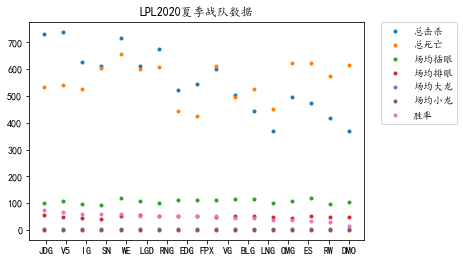

<Figure size 1500x1200 with 0 Axes>

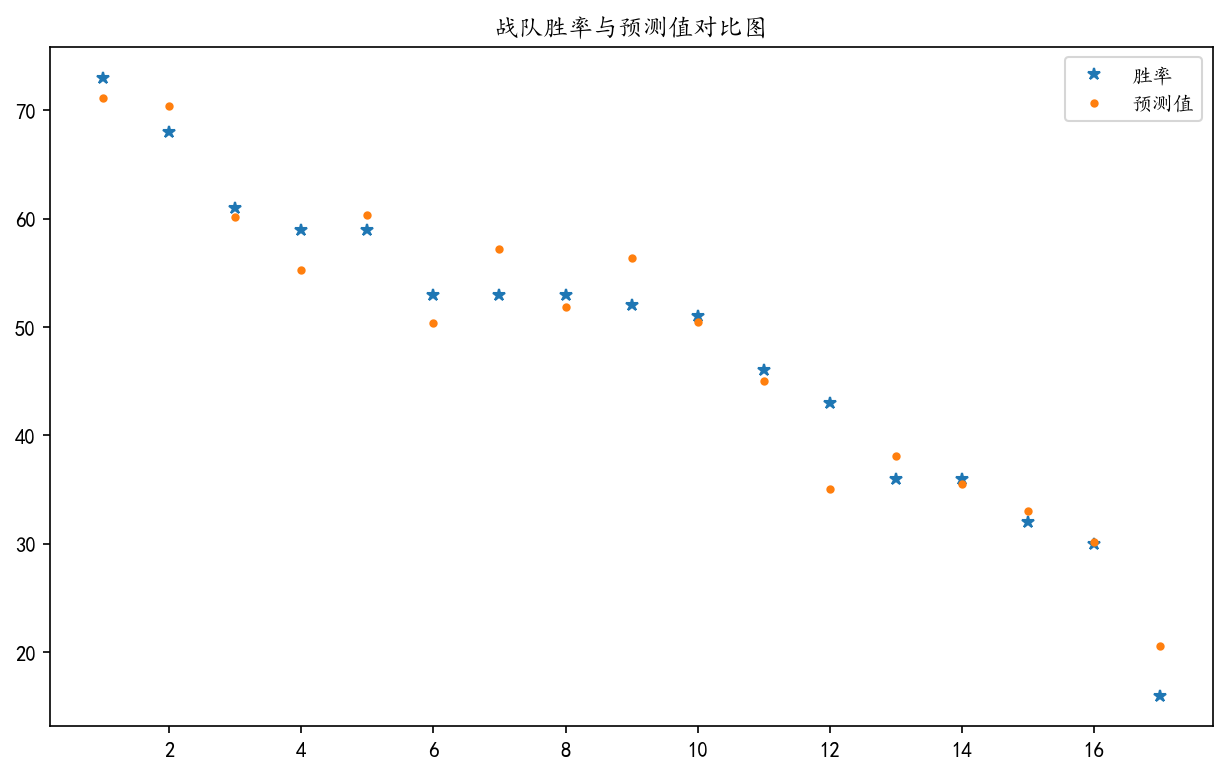

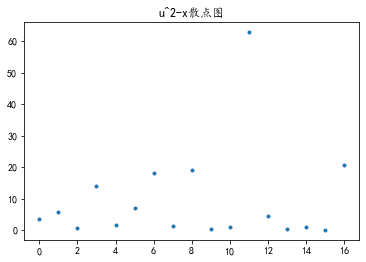

<Figure size 1500x900 with 0 Axes>

[1.2572859551200348, 4.3896223710055, -4.046272729870864, -0.5042845103220551, -0.47004654354260095, -0.41609316477057307, 0.6089343776716555, 1.1712735989459944]


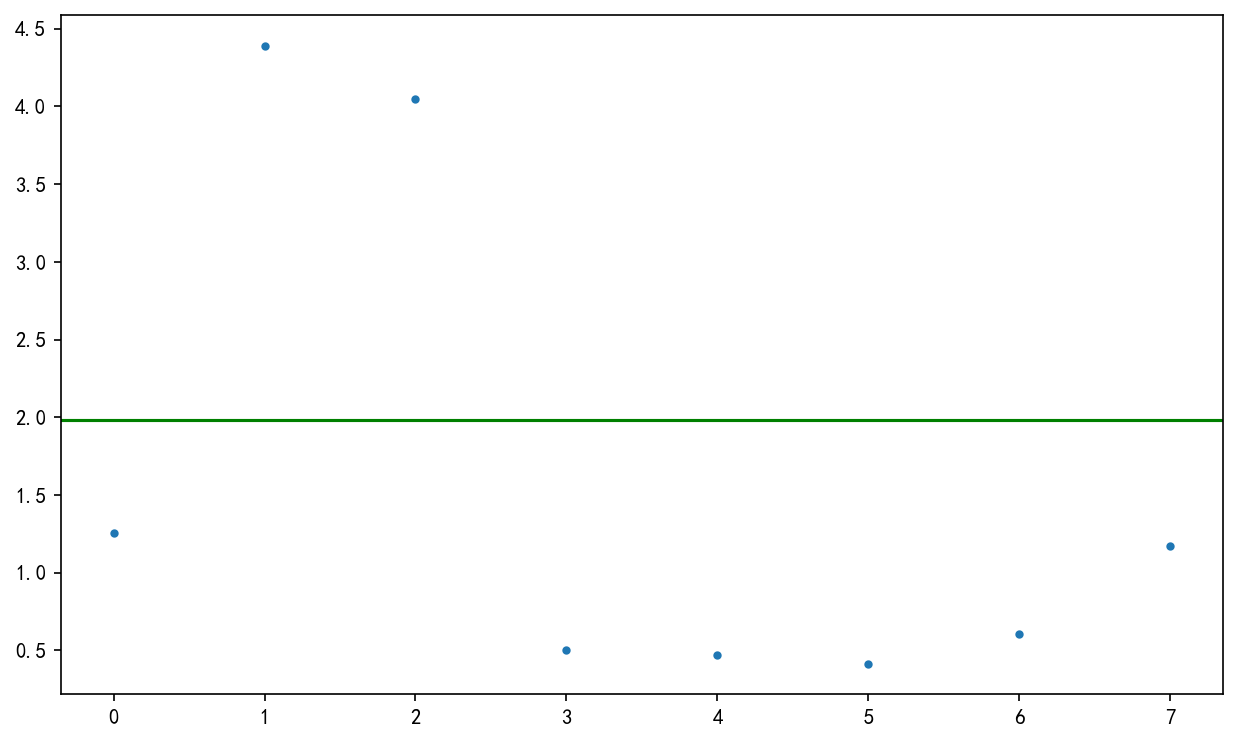

20.540543123650515


D:\BestSoftware\AdvancedProgrammingLanguageWebDesign\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                winRate   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     26.17
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           2.74e-05
Time:                        22:59:21   Log-Likelihood:                -43.275
No. Observations:                  17   AIC:                             102.6
Df Residuals:                       9   BIC:                             109.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            49.5518     47.367      1.046      0.323     -57.600     156.703
totalKill_perGame     0.1009      0.028      3.652      0.005       0.038       0.163
totalDie_perGame     -0.0699      0.021     -3.367      0.008      -0.117      -0.023
catchEye_perGame     -0.0907      0.216     -0.420      0.685      -0.580       0.398
rowEye_perGame       -0.1575      0.403     -0.391      0.705      -1.068       0.753
money_perGame        -0.0004      0.001     -0.346      0.737      -0.003       0.002
baron_perGame         5.1522     10.169      0.507      0.625     -17.852      28.156
dragon_perGame       16.1270     16.548      0.975      0.355     -21.307      53.561
==============================================================================
Omnibus:                        2.845   Durbin-Watson:                   2.394
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                1.183
Skew:                           0.598   Prob(JB):                        0.554
Kurtosis:                       3.490   Cond. No.                     2.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate = read_check_data('LPL2020夏季赛team数据.xlsx')
X, B, y_predict = multiple_regression(x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate)
check(y_winRate, y_predict, X, B)
df2 = pd.read_excel('LPL2020夏季赛team数据.xlsx', sheet_name=0)
lm2 = ols('winRate ~ totalKill_perGame + totalDie_perGame + catchEye_perGame + rowEye_perGame + money_perGame + baron_perGame + dragon_perGame', data=df2).fit()
lm2.summary()

dragon_perGame       0
baron_perGame        0
money_perGame        0
rowEye_perGame       0
catchEye_perGame     0
totalDie_perGame     0
totalKill_perGame    0
winRate              0
win_lose             0
appearance           0
team                 0
trank                0
dtype: int64
矩阵： [(1.0, 873, 638, 116, 56, 60069, 1.0, 2.5), (1.0, 708, 489, 108, 54, 58986, 0.7, 2.5), (1.0, 835, 708, 96, 42, 55762, 0.8, 2.1), (1.0, 571, 484, 107, 51, 58330, 0.6, 2.5), (1.0, 789, 566, 96, 54, 58389, 0.8, 2.3), (1.0, 517, 472, 97, 49, 54656, 0.6, 2.2), (1.0, 645, 426, 118, 54, 57641, 0.6, 2.3), (1.0, 566, 571, 114, 58, 59273, 0.7, 2.3), (1.0, 591, 515, 94, 46, 53731, 0.7, 2.5), (1.0, 415, 464, 107, 45, 53008, 0.4, 1.8), (1.0, 456, 539, 91, 42, 52423, 0.5, 1.6), (1.0, 438, 544, 105, 48, 55435, 0.6, 2.0), (1.0, 424, 598, 102, 47, 54167, 0.6, 2.0), (1.0, 392, 547, 96, 48, 52470, 0.4, 1.8), (1.0, 403, 594, 100, 44, 51636, 0.5, 1.8), (1.0, 376, 559, 104, 48, 51480, 0.1, 1.6), (1.0, 293, 590, 98, 43, 

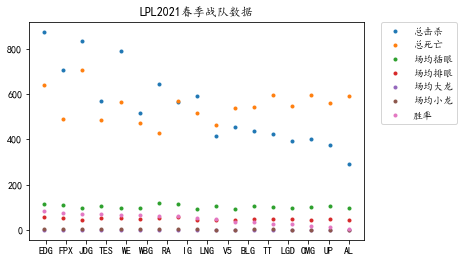

<Figure size 1500x1200 with 0 Axes>

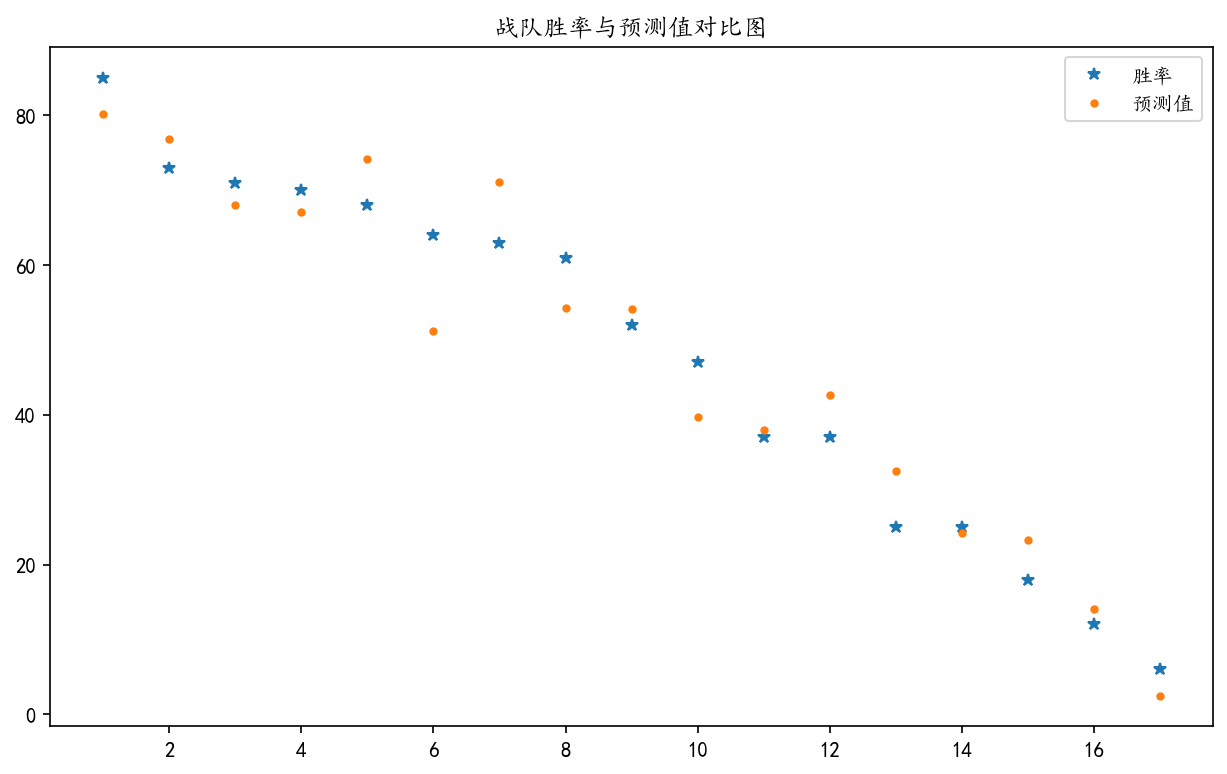

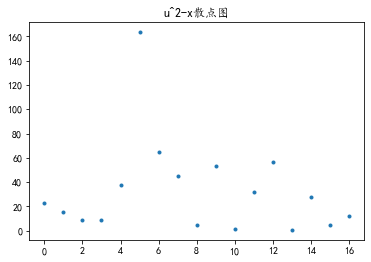

<Figure size 1500x900 with 0 Axes>

[-1.5737620906080299, 3.318191597969361, -2.8098555907638922, -0.037704979106964694, -1.638252438945404, 2.040006451842886, 0.522253858572489, 0.11342745505839992]


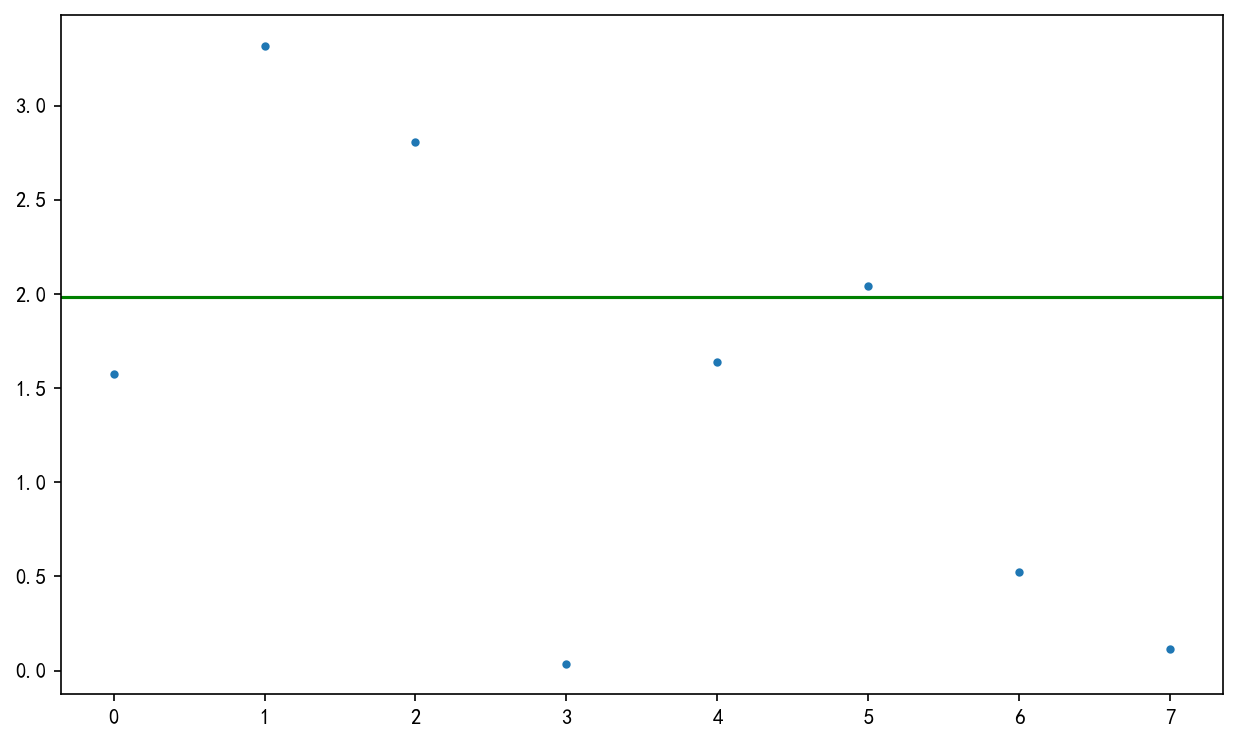

2.506757752959918


D:\BestSoftware\AdvancedProgrammingLanguageWebDesign\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                winRate   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     20.26
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           7.92e-05
Time:                        22:59:22   Log-Likelihood:                -53.780
No. Observations:                  17   AIC:                             123.6
Df Residuals:                       9   BIC:                             130.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -115.8909     88.504     -1.309      0.223    -316.100      84.318
totalKill_perGame     0.0745      0.027      2.761      0.022       0.013       0.136
totalDie_perGame     -0.0949      0.041     -2.338      0.044      -0.187      -0.003
catchEye_perGame     -0.0121      0.384     -0.031      0.976      -0.882       0.858
rowEye_perGame       -1.2622      0.926     -1.363      0.206      -3.357       0.832
money_perGame         0.0041      0.002      1.697      0.124      -0.001       0.010
baron_perGame        11.0949     25.532      0.435      0.674     -46.663      68.853
dragon_perGame        1.3844     14.669      0.094      0.927     -31.799      34.567
==============================================================================
Omnibus:                        0.904   Durbin-Watson:                   2.908
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.836
Skew:                           0.441   Prob(JB):                        0.658
Kurtosis:                       2.367   Cond. No.                     2.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate = read_check_data('LPL2021春季赛team数据.xlsx')
X, B, y_predict = multiple_regression(x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate)
check(y_winRate, y_predict, X, B)
df3 = pd.read_excel('LPL2021春季赛team数据.xlsx', sheet_name=0)
lm3 = ols('winRate ~ totalKill_perGame + totalDie_perGame + catchEye_perGame + rowEye_perGame + money_perGame + baron_perGame + dragon_perGame', data=df3).fit()
lm3.summary()

dragon_perGame       0
baron_perGame        0
money_perGame        0
rowEye_perGame       0
catchEye_perGame     0
totalDie_perGame     0
totalKill_perGame    0
winRate              0
win_lose             0
appearance           0
team                 0
trank                0
dtype: int64
矩阵： [(1.0, 813, 636, 104, 48, 58620, 0.6, 2.6), (1.0, 766, 543, 104, 52, 58558, 0.8, 2.6), (1.0, 576, 529, 102, 53, 55811, 0.5, 2.5), (1.0, 913, 798, 106, 52, 59038, 0.7, 2.2), (1.0, 867, 768, 113, 50, 57997, 0.6, 1.8), (1.0, 608, 596, 104, 48, 58066, 0.7, 2.2), (1.0, 646, 533, 102, 50, 59333, 0.8, 2.5), (1.0, 656, 567, 112, 53, 58927, 0.8, 2.2), (1.0, 621, 508, 134, 55, 59181, 0.5, 2.1), (1.0, 488, 543, 88, 43, 51772, 0.5, 2.0), (1.0, 507, 555, 102, 46, 55374, 0.5, 2.1), (1.0, 507, 543, 98, 52, 55922, 0.5, 2.0), (1.0, 472, 556, 97, 45, 53287, 0.6, 1.9), (1.0, 455, 607, 102, 47, 53512, 0.5, 1.9), (1.0, 467, 594, 99, 46, 54115, 0.5, 1.6), (1.0, 369, 592, 100, 45, 51552, 0.3, 1.8), (1.0, 271, 548, 99, 43

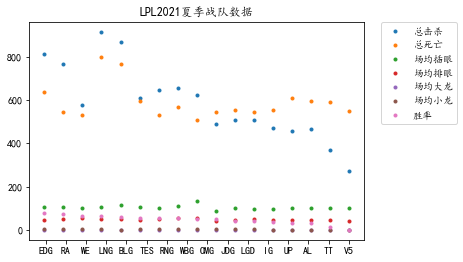

<Figure size 1500x1200 with 0 Axes>

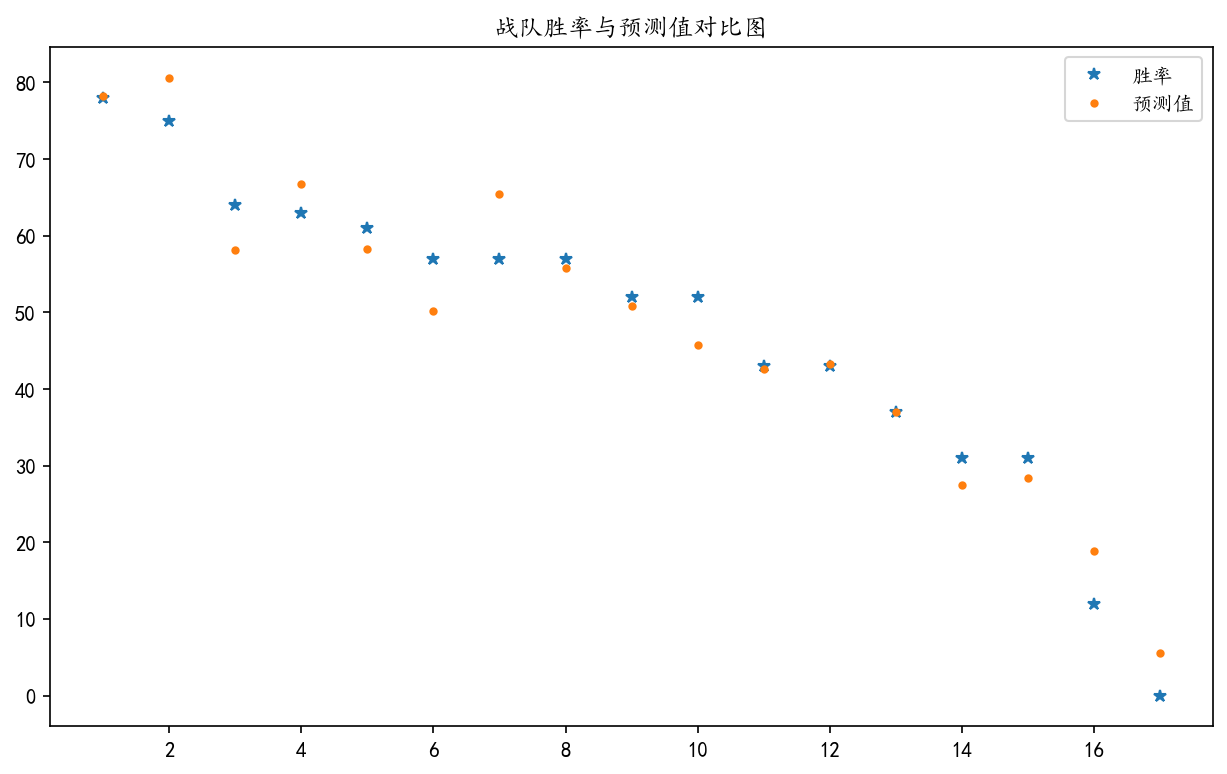

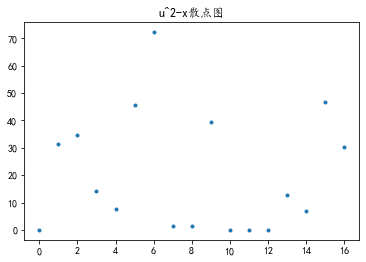

<Figure size 1500x900 with 0 Axes>

[0.9873518410108754, 4.739735644725891, -2.889963914556957, -1.1749509944816479, -0.23184164397689505, -0.031031773209006346, -0.3231926984574897, 1.2469921491222944]


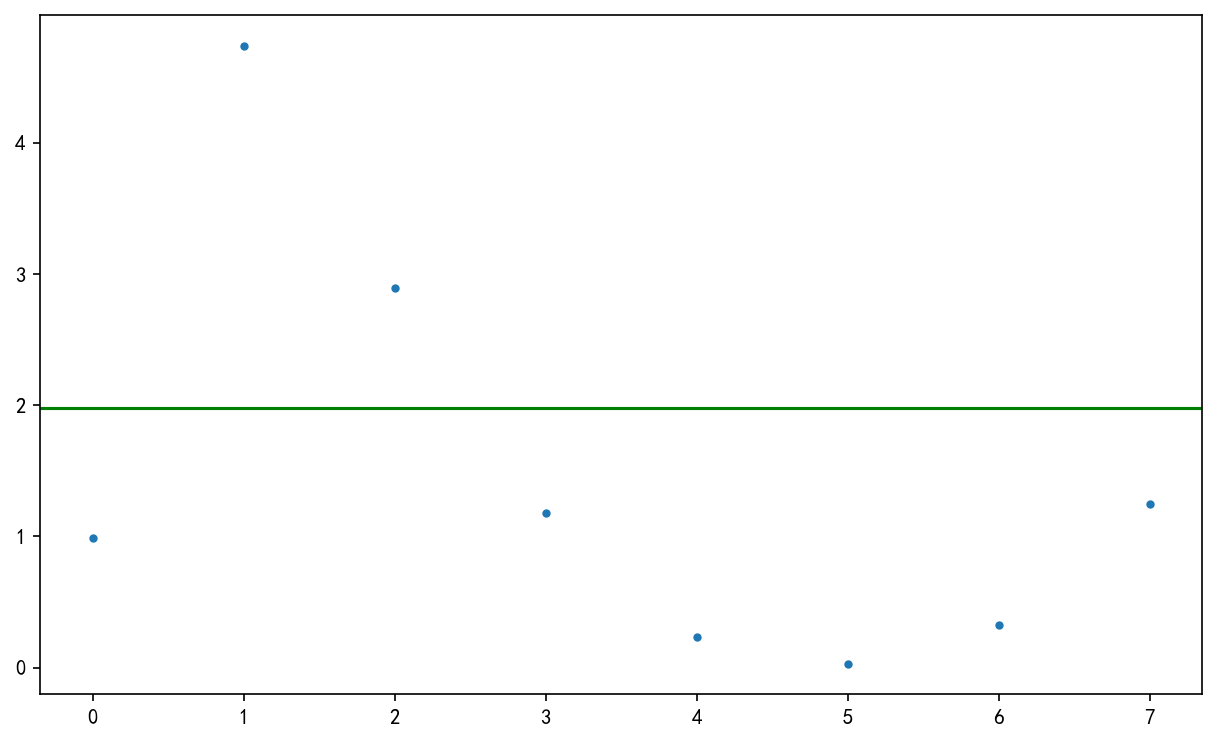

5.498725992583372


D:\BestSoftware\AdvancedProgrammingLanguageWebDesign\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                winRate   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     24.44
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           3.64e-05
Time:                        22:59:23   Log-Likelihood:                -49.709
No. Observations:                  17   AIC:                             115.4
Df Residuals:                       9   BIC:                             122.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            62.3456     75.890      0.822      0.433    -109.329     234.021
totalKill_perGame     0.1341      0.034      3.944      0.003       0.057       0.211
totalDie_perGame     -0.1140      0.047     -2.405      0.040      -0.221      -0.007
catchEye_perGame     -0.3362      0.344     -0.978      0.354      -1.114       0.442
rowEye_perGame       -0.1590      0.824     -0.193      0.851      -2.023       1.705
money_perGame     -5.455e-05      0.002     -0.026      0.980      -0.005       0.005
baron_perGame        -6.1338     22.810     -0.269      0.794     -57.732      45.465
dragon_perGame       11.0459     10.646      1.038      0.327     -13.037      35.129
==============================================================================
Omnibus:                        1.007   Durbin-Watson:                   2.338
Prob(Omnibus):                  0.604   Jarque-Bera (JB):                0.856
Skew:                          -0.309   Prob(JB):                        0.652
Kurtosis:                       2.091   Cond. No.                     2.85e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate = read_check_data('LPL2021夏季赛team数据.xlsx')
X, B, y_predict = multiple_regression(x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate)
check(y_winRate, y_predict, X, B)
df4 = pd.read_excel('LPL2021夏季赛team数据.xlsx', sheet_name=0)
lm4 = ols('winRate ~ totalKill_perGame + totalDie_perGame + catchEye_perGame + rowEye_perGame + money_perGame + baron_perGame + dragon_perGame', data=df4).fit()
lm4.summary()

dragon_perGame       0
baron_perGame        0
money_perGame        0
rowEye_perGame       0
catchEye_perGame     0
totalDie_perGame     0
totalKill_perGame    0
winRate              0
win_lose             0
appearance           0
team                 0
trank                0
dtype: int64
矩阵： [(1.0, 813, 636, 104, 48, 58620, 0.6, 2.6), (1.0, 766, 543, 104, 52, 58558, 0.8, 2.6), (1.0, 576, 529, 102, 53, 55811, 0.5, 2.5), (1.0, 913, 798, 106, 52, 59038, 0.7, 2.2), (1.0, 867, 768, 113, 50, 57997, 0.6, 1.8), (1.0, 608, 596, 104, 48, 58066, 0.7, 2.2), (1.0, 646, 533, 102, 50, 59333, 0.8, 2.5), (1.0, 656, 567, 112, 53, 58927, 0.8, 2.2), (1.0, 621, 508, 134, 55, 59181, 0.5, 2.1), (1.0, 488, 543, 88, 43, 51772, 0.5, 2.0), (1.0, 507, 555, 102, 46, 55374, 0.5, 2.1), (1.0, 507, 543, 98, 52, 55922, 0.5, 2.0), (1.0, 472, 556, 97, 45, 53287, 0.6, 1.9), (1.0, 455, 607, 102, 47, 53512, 0.5, 1.9), (1.0, 467, 594, 99, 46, 54115, 0.5, 1.6), (1.0, 369, 592, 100, 45, 51552, 0.3, 1.8), (1.0, 271, 548, 99, 43

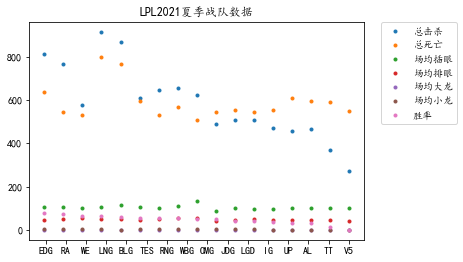

<Figure size 1500x1200 with 0 Axes>

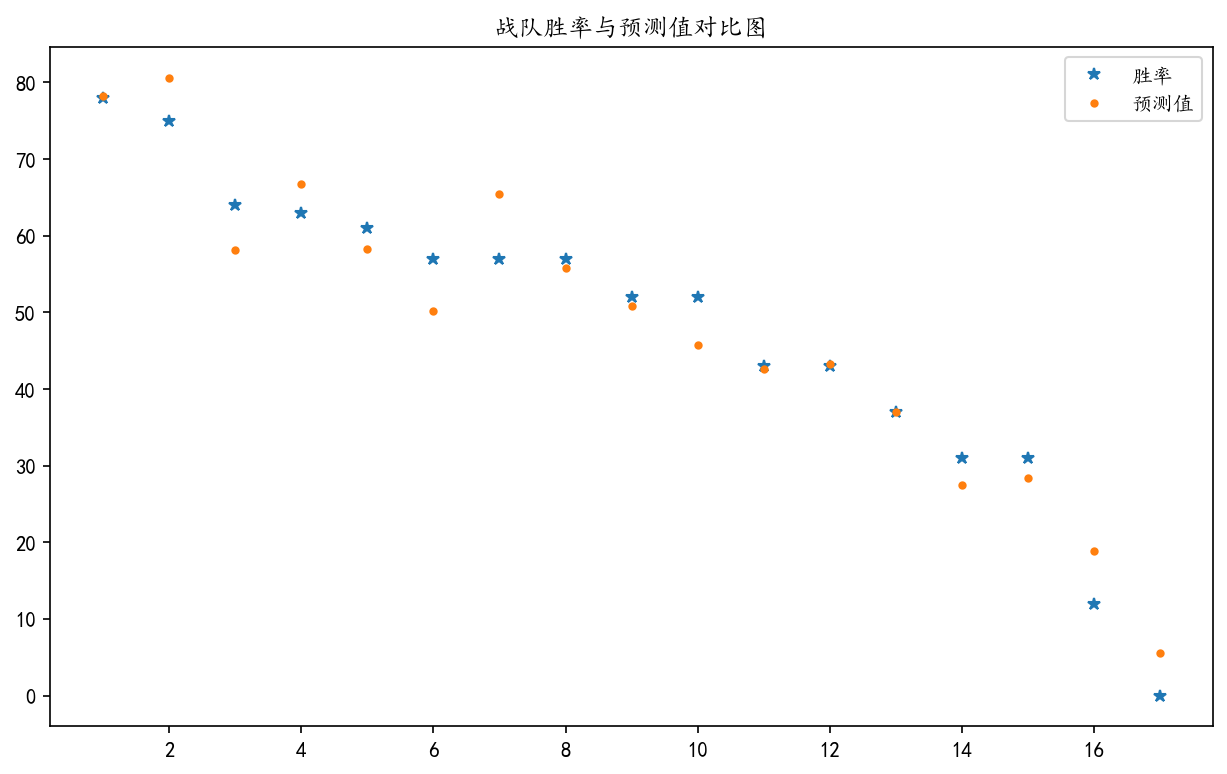

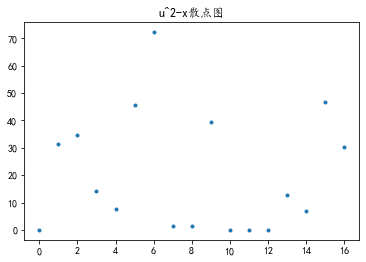

<Figure size 1500x900 with 0 Axes>

[0.9873518410108754, 4.739735644725891, -2.889963914556957, -1.1749509944816479, -0.23184164397689505, -0.031031773209006346, -0.3231926984574897, 1.2469921491222944]


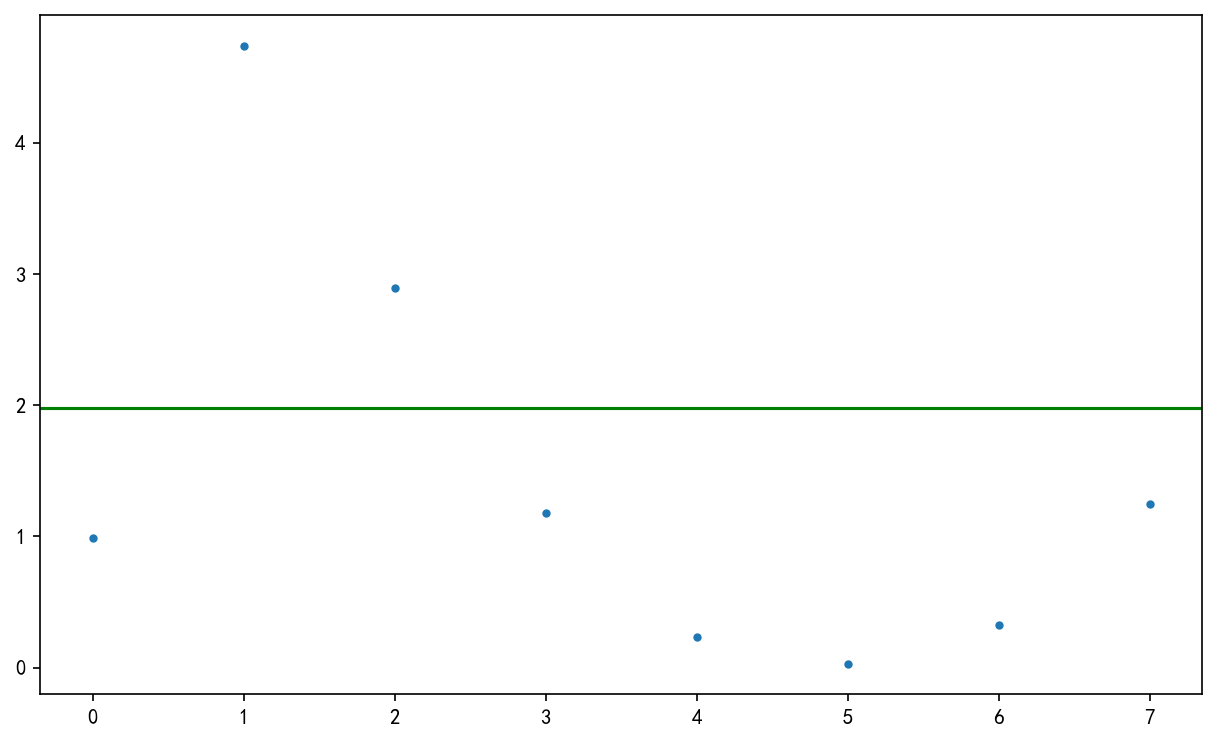

5.498725992583372


D:\BestSoftware\AdvancedProgrammingLanguageWebDesign\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                winRate   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     30.75
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           1.39e-05
Time:                        22:59:24   Log-Likelihood:                -47.389
No. Observations:                  17   AIC:                             110.8
Df Residuals:                       9   BIC:                             117.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -105.4665     58.809     -1.793      0.106    -238.501      27.568
totalKill_perGame     0.0819      0.024      3.349      0.009       0.027       0.137
totalDie_perGame     -0.0937      0.036     -2.571      0.030      -0.176      -0.011
catchEye_perGame     -0.5683      0.367     -1.547      0.156      -1.399       0.263
rowEye_perGame        1.0661      0.780      1.367      0.205      -0.698       2.831
money_perGame         0.0027      0.002      1.792      0.107      -0.001       0.006
baron_perGame        47.4101     27.181      1.744      0.115     -14.077     108.898
dragon_perGame       -8.4224      7.634     -1.103      0.299     -25.692       8.848
==============================================================================
Omnibus:                        3.558   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                1.550
Skew:                          -0.071   Prob(JB):                        0.461
Kurtosis:                       4.472   Cond. No.                     2.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate = read_check_data('LPL2021夏季赛team数据.xlsx')
X, B, y_predict = multiple_regression(x_first, x_second, x_third, x_fourth, x_fifth, x_sixth, x_seventh, y_winRate)
check(y_winRate, y_predict, X, B)
df5 = pd.read_excel('LPL2022春季赛team数据.xlsx', sheet_name=0)
lm5 = ols('winRate ~ totalKill_perGame + totalDie_perGame + catchEye_perGame + rowEye_perGame + money_perGame + baron_perGame + dragon_perGame', data=df5).fit()
lm5.summary()